In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

In [2]:
import kagglehub
path=kagglehub.dataset_download("matiflatif/amazon-complete-stocks-data")
print("Path to dataset files:",path)

Path to dataset files: /kaggle/input/amazon-complete-stocks-data


In [3]:
import numpy as np
import pandas as pd
data=pd.read_csv('/kaggle/input/amazon-complete-stocks-data/AMZN_1997-03-16_2025-01-31.csv')

In [4]:
#Viewing first few entries of the data
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [5]:
#Viewing few of the last entries of the data
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6967,2025-01-24,234.500000,236.399994,232.929993,234.850006,234.850006,25890700
6968,2025-01-27,226.210007,235.610001,225.860001,235.419998,235.419998,49428300
6969,2025-01-28,234.289993,241.770004,233.979996,238.149994,238.149994,41587200
6970,2025-01-29,239.020004,240.389999,236.149994,237.070007,237.070007,26091700
6971,2025-01-30,237.139999,237.949997,232.220001,234.639999,234.639999,31965300


In [6]:
#Information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6972 entries, 0 to 6971
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6972 non-null   object 
 1   Open       6972 non-null   float64
 2   High       6972 non-null   float64
 3   Low        6972 non-null   float64
 4   Close      6972 non-null   float64
 5   Adj Close  6972 non-null   float64
 6   Volume     6972 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 381.4+ KB
None


In [7]:
#Summary statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6.972000e+03
mean,40.282471,40.752425,39.772359,40.275186,40.275186,1.362637e+08
std,57.528903,58.170581,56.824877,57.510435,57.510435,1.376463e+08
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06
25%,2.099250,2.146375,2.062375,2.106875,2.106875,6.334100e+07
50%,8.989750,9.117500,8.880750,8.998250,8.998250,1.006790e+08
75%,71.899250,72.778873,70.048628,71.630999,71.630999,1.556060e+08
max,239.020004,241.770004,236.149994,238.149994,238.149994,2.086584e+09


In [8]:
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')

In [9]:
#Check for null values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [10]:
#Check for NA values
print(data.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


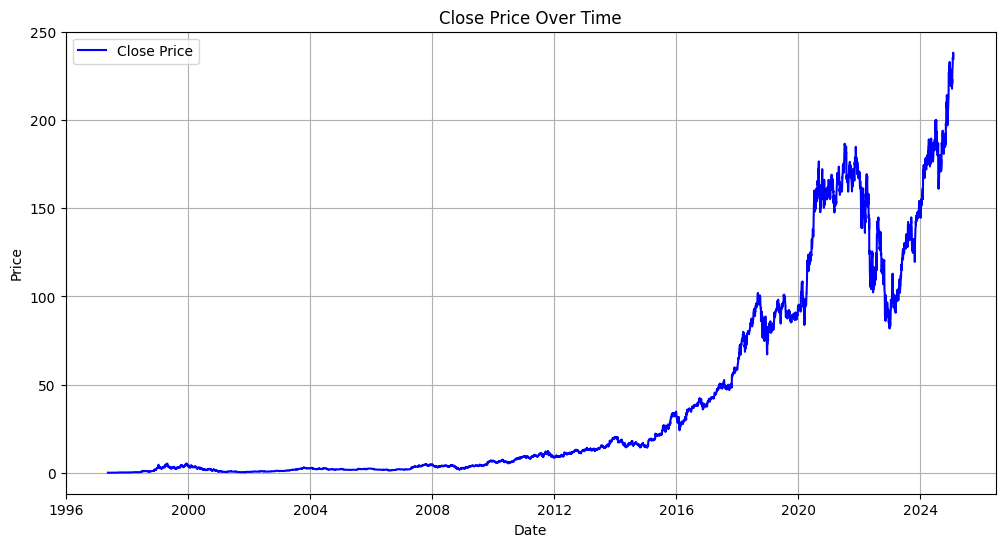

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Close'],color='blue',label='Close Price')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

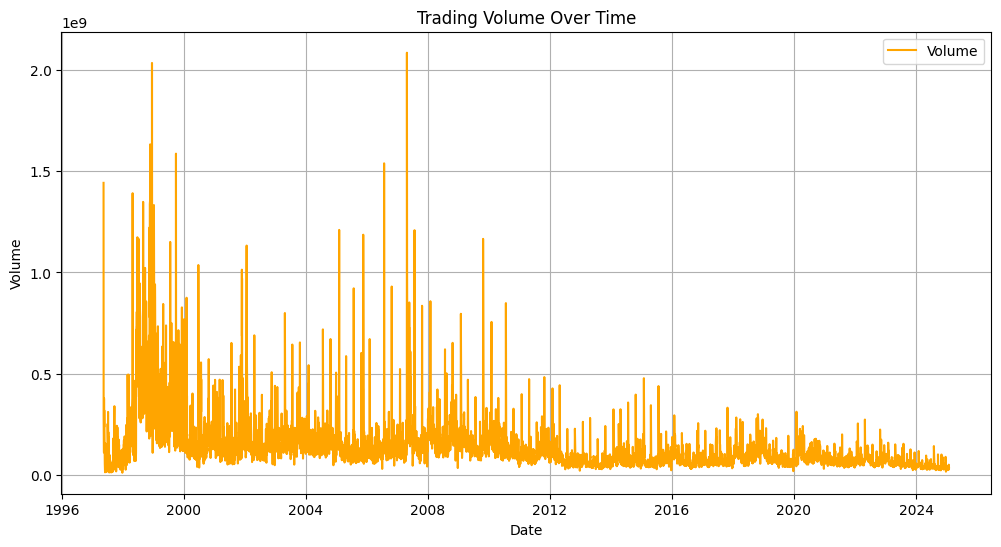

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Volume'],color='orange',label='Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

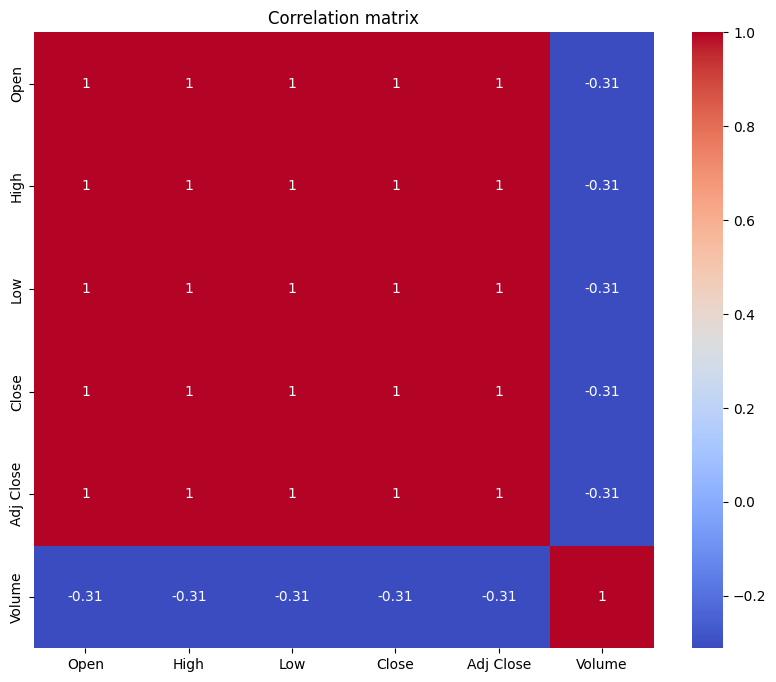

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data_numeric=data.select_dtypes(include=[np.number])
corr_matrix=data_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [14]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [15]:
#Feature engineering
features=['Open','High','Low','Volume','Adj Close']
target='Close'
X=data[features].values
y=data[[target]].values

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler_X=MinMaxScaler()
scaler_y=MinMaxScaler()
X_scaled=scaler_X.fit_transform(X)
y_scaled=scaler_y.fit_transform(y)

In [17]:
def create_sequences(X,y,time_steps):
    Xs,ys=[],[]
    for i in range(time_steps,len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs),np.array(ys)

In [18]:
time_steps=10
X_seq,y_seq=create_sequences(X_scaled,y_scaled,time_steps)

In [19]:
#Train-test and validation split
from sklearn.model_selection import train_test_split
X_temp,X_test,y_temp,y_test=train_test_split(X_seq,y_seq,test_size=0.15,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.1176,random_state=42)

In [20]:
#GRU Model
from tensorflow.keras import layers,models
model_gru=models.Sequential([
    layers.GRU(units=512,return_sequences=True,activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])),
    layers.Dropout(rate=0.2),
    layers.GRU(units=256,return_sequences=False,activation='tanh'),
    layers.Dropout(rate=0.2),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=1,activation='linear')
])
model_gru.summary()

2025-07-18 19:40:40.687950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752867640.871551      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752867640.928171      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1752867652.147058      36 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1752867652.149191      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pa

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 512)        │       797,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 256)            │       591,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,569 (5.42 MB)

 Trainable params: 1,421,569 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.optimizers import Adam
model_gru.compile(optimizer=Adam(learning_rate=0.0001),loss='mse',metrics=['mae'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
early_stopper=EarlyStopping(patience=5,restore_best_weights=True,monitor='val_loss',verbose=1)
lr_scheduler=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,min_lr=1e-6,verbose=1)

In [23]:
history=model_gru.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[early_stopper,lr_scheduler])

Epoch 1/50


I0000 00:00:1752867657.535014      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0213 - mae: 0.0678 - val_loss: 1.3529e-04 - val_mae: 0.0056 - learning_rate: 1.0000e-04
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.3387e-04 - mae: 0.0107 - val_loss: 8.7158e-05 - val_mae: 0.0047 - learning_rate: 1.0000e-04
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2708e-04 - mae: 0.0102 - val_loss: 2.0416e-04 - val_mae: 0.0080 - learning_rate: 1.0000e-04
Epoch 4/50
78/82 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6465e-04 - mae: 0.0094
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6473e-04 - mae: 0.0094 - val_loss: 1.0285e-04 - val_mae: 0.0051 - learning_rate: 1.0000e-04
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4192e-04 - mae: 0.0096 - val_loss: 1.1506e-04 - val_mae: 0.0056 - learning_rate: 5.0000e-05
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.1633e-04 - mae: 0.0090 - val_loss: 1.0747e-04 

In [24]:
y_pred_val_gru=model_gru.predict(X_val)
y_pred_test_gru=model_gru.predict(X_test)

y_pred_val_inv_gru=scaler_y.inverse_transform(y_pred_val_gru)
y_val_inv_gru=scaler_y.inverse_transform(y_val)

y_pred_test_inv_gru=scaler_y.inverse_transform(y_pred_test_gru)
y_test_inv_gru=scaler_y.inverse_transform(y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
#Performance metrics on test data set
mae_test_gru=mean_absolute_error(y_test_inv_gru,y_pred_test_inv_gru)
mse_test_gru=mean_squared_error(y_test_inv_gru,y_pred_test_inv_gru)
rmse_test_gru=np.sqrt(mse_test_gru)
r2_test_gru=r2_score(y_test_inv_gru,y_pred_test_inv_gru)
evs_test_gru=explained_variance_score(y_test_inv_gru,y_pred_test_inv_gru)

In [26]:
#Performance metrics on validation data set
mae_val_gru=mean_absolute_error(y_val_inv_gru,y_pred_val_inv_gru)
mse_val_gru=mean_squared_error(y_val_inv_gru,y_pred_val_inv_gru)
rmse_val_gru=np.sqrt(mse_val_gru)
r2_val_gru=r2_score(y_val_inv_gru,y_pred_val_inv_gru)
evs_val_gru=explained_variance_score(y_val_inv_gru,y_pred_val_inv_gru)

In [27]:
print("\nTest Metrics for GRU")
print(f"MAE:{mae_test_gru:.4f}")
print(f"MSE:{mse_test_gru:.4f}")
print(f"RMSE:{rmse_test_gru:.4f}")
print(f"R²:{r2_test_gru:.4f}")
print(f"EVS:{evs_test_gru:.4f}")


Test Metrics for GRU
MAE:1.1333
MSE:5.9778
RMSE:2.4450
R²:0.9983
EVS:0.9983


In [28]:
print("\nValidation Metrics for GRU")
print(f"MAE:{mae_val_gru:.4f}")
print(f"MSE:{mse_val_gru:.4f}")
print(f"RMSE:{rmse_val_gru:.4f}")
print(f"R²:{r2_val_gru:.4f}")
print(f"EVS:{evs_val_gru:.4f}")


Validation Metrics for GRU
MAE:1.1224
MSE:4.9403
RMSE:2.2227
R²:0.9985
EVS:0.9985


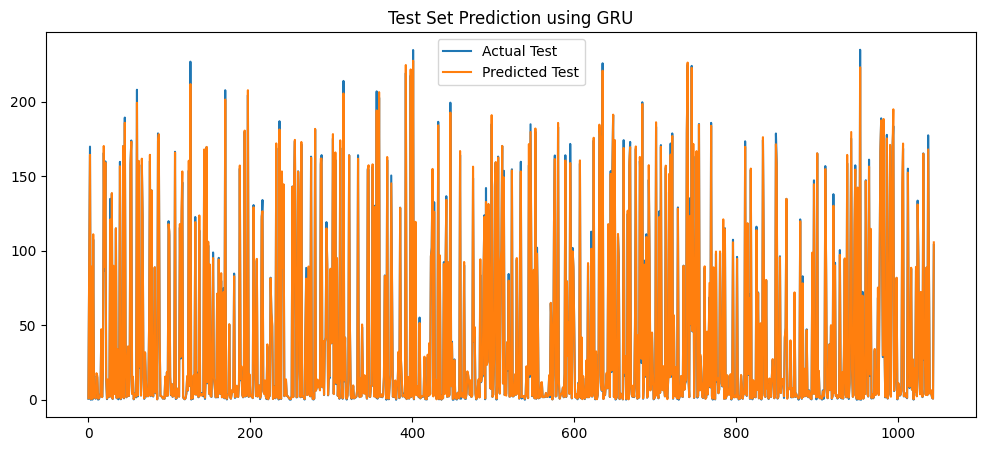

In [29]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv_gru,label='Actual Test')
plt.plot(y_pred_test_inv_gru,label='Predicted Test')
plt.title('Test Set Prediction using GRU')
plt.legend()
plt.show()

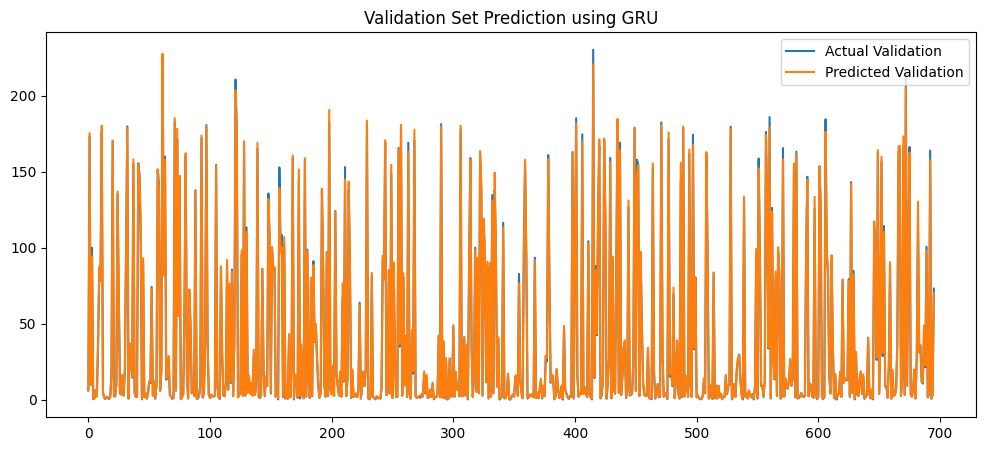

In [30]:
# Validation
plt.figure(figsize=(12,5))
plt.plot(y_val_inv_gru,label='Actual Validation')
plt.plot(y_pred_val_inv_gru,label='Predicted Validation')
plt.title('Validation Set Prediction using GRU')
plt.legend()

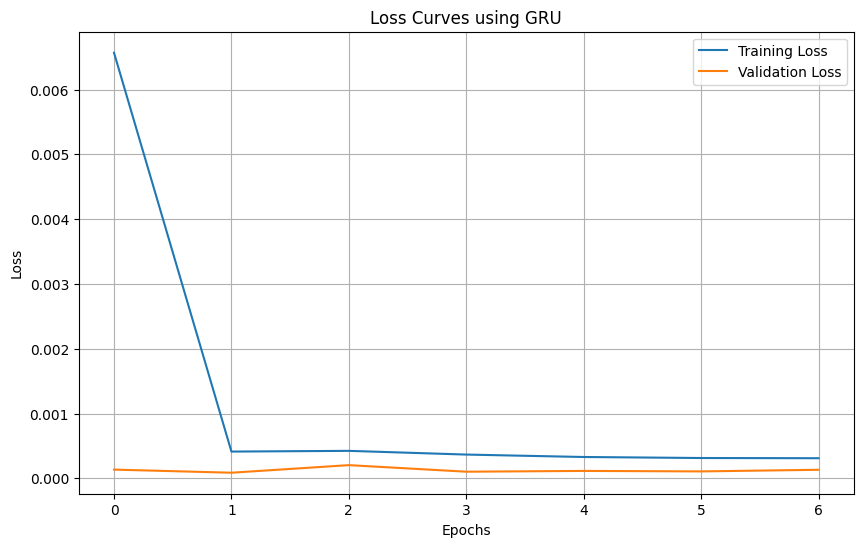

In [31]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Loss Curves using GRU')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#LSTM Model building
model_lstm=models.Sequential([
    layers.LSTM(units=512,return_sequences=True,activation='tanh',input_shape=(X_train.shape[1],X_train.shape[2])),
    layers.Dropout(rate=0.2),
    layers.LSTM(units=256,return_sequences=False,activation='tanh'),
    layers.Dropout(rate=0.2),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=1,activation='linear')
])
model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 512)        │     1,060,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,881,345 (7.18 MB)

 Trainable params: 1,881,345 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_lstm.compile(optimizer=Adam(learning_rate=0.0001),loss='mse',metrics=['mae'])

In [34]:
history1=model_lstm.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=64,verbose=1,callbacks=[early_stopper,lr_scheduler])

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0232 - mae: 0.0718 - val_loss: 2.9362e-04 - val_mae: 0.0095 - learning_rate: 1.0000e-04
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6004e-04 - mae: 0.0109 - val_loss: 1.3930e-04 - val_mae: 0.0057 - learning_rate: 1.0000e-04
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2551e-04 - mae: 0.0104 - val_loss: 1.4511e-04 - val_mae: 0.0059 - learning_rate: 1.0000e-04
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2481e-04 - mae: 0.0101 - val_loss: 1.3644e-04 - val_mae: 0.0055 - learning_rate: 1.0000e-04
Epoch 5/50
78/82 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8197e-04 - mae: 0.0096
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8063e-04 - mae: 0.0096 - val_loss: 2.0847e-04 - val_mae: 0.0071 - learning_rate: 1.0000e-04
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4021e-04 - mae: 0.0090 - val_loss: 

In [35]:
y_pred_val_lstm=model_lstm.predict(X_val)
y_pred_test_lstm=model_lstm.predict(X_test)

y_pred_val_inv_lstm=scaler_y.inverse_transform(y_pred_val_lstm)
y_val_inv_lstm=scaler_y.inverse_transform(y_val)

y_pred_test_inv_lstm=scaler_y.inverse_transform(y_pred_test_lstm)
y_test_inv_lstm=scaler_y.inverse_transform(y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
#Performance metrics on test data set
mae_test_lstm=mean_absolute_error(y_test_inv_lstm,y_pred_test_inv_lstm)
mse_test_lstm=mean_squared_error(y_test_inv_lstm,y_pred_test_inv_lstm)
rmse_test_lstm=np.sqrt(mse_test_lstm)
r2_test_lstm=r2_score(y_test_inv_lstm,y_pred_test_inv_lstm)
evs_test_lstm=explained_variance_score(y_test_inv_lstm,y_pred_test_inv_lstm)

In [37]:
#Performance metrics on validation data set
mae_val_lstm=mean_absolute_error(y_val_inv_lstm,y_pred_val_inv_lstm)
mse_val_lstm=mean_squared_error(y_val_inv_lstm,y_pred_val_inv_lstm)
rmse_val_lstm=np.sqrt(mse_val_lstm)
r2_val_lstm=r2_score(y_val_inv_lstm,y_pred_val_inv_lstm)
evs_val_lstm=explained_variance_score(y_val_inv_lstm,y_pred_val_inv_lstm)

In [38]:
print("\nTest Metrics for LSTM")
print(f"MAE:{mae_test_lstm:.4f}")
print(f"MSE:{mse_test_lstm:.4f}")
print(f"RMSE:{rmse_test_lstm:.4f}")
print(f"R²:{r2_test_lstm:.4f}")
print(f"EVS:{evs_test_lstm:.4f}")


Test Metrics for LSTM
MAE:1.3866
MSE:9.4842
RMSE:3.0796
R²:0.9973
EVS:0.9973


In [39]:
print("\nValidation Metrics for LSTM")
print(f"MAE:{mae_val_lstm:.4f}")
print(f"MSE:{mse_val_lstm:.4f}")
print(f"RMSE:{rmse_val_lstm:.4f}")
print(f"R²:{r2_val_lstm:.4f}")
print(f"EVS:{evs_val_lstm:.4f}")


Validation Metrics for LSTM
MAE:1.3101
MSE:7.7336
RMSE:2.7809
R²:0.9976
EVS:0.9976


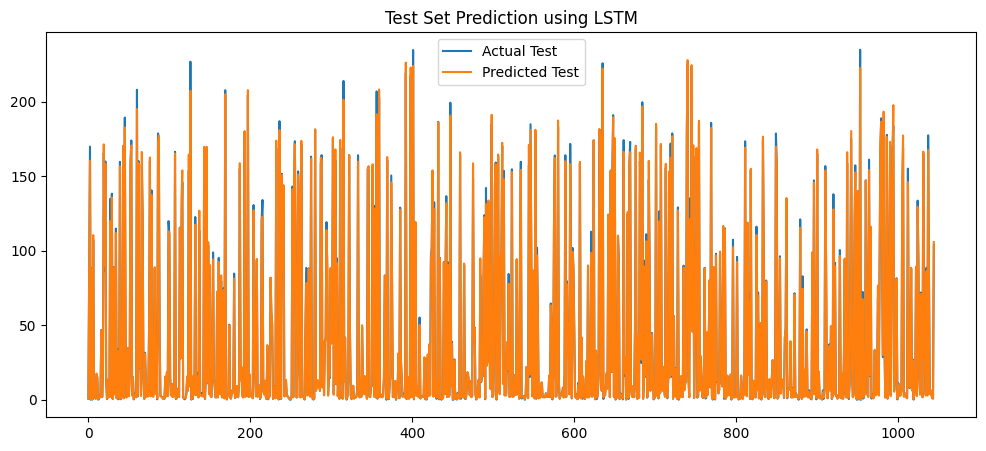

In [40]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv_lstm,label='Actual Test')
plt.plot(y_pred_test_inv_lstm,label='Predicted Test')
plt.title('Test Set Prediction using LSTM')
plt.legend()
plt.show()

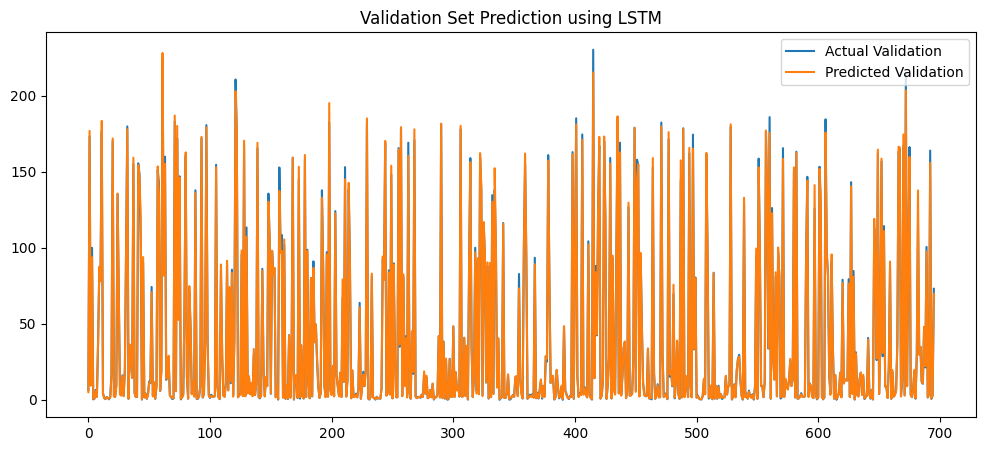

In [41]:
# Validation
plt.figure(figsize=(12,5))
plt.plot(y_val_inv_lstm,label='Actual Validation')
plt.plot(y_pred_val_inv_lstm,label='Predicted Validation')
plt.title('Validation Set Prediction using LSTM')
plt.legend()

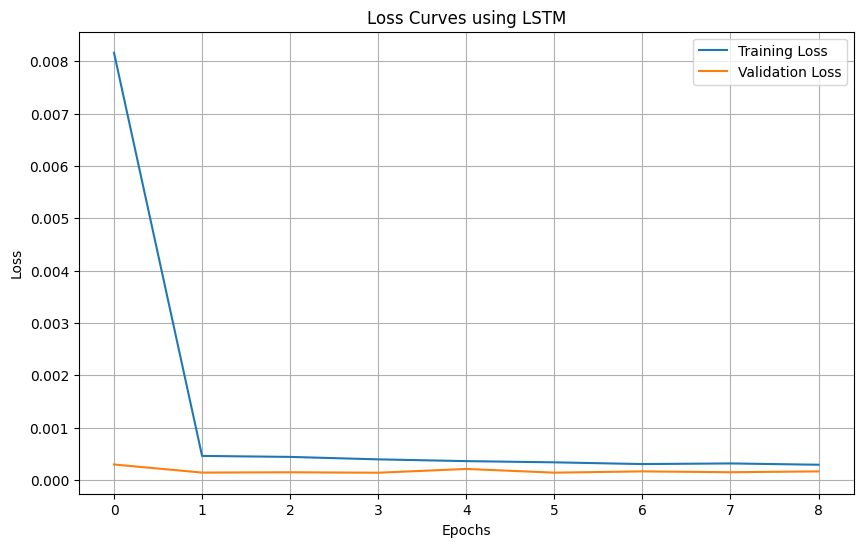

In [42]:
plt.figure(figsize=(10,6))
plt.plot(history1.history['loss'],label='Training Loss')
plt.plot(history1.history['val_loss'],label='Validation Loss')
plt.title('Loss Curves using LSTM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
#Hybrid model using GRU+Conv1D layers
model_hybrid=models.Sequential([
    layers.Conv1D(filters=64,kernel_size=3,padding='same',input_shape=(X_train.shape[1],X_train.shape[2])),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.GRU(units=256,return_sequences=True,activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),

    layers.GRU(units=128,return_sequences=False,activation='tanh'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),

    layers.Dense(units=64),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(units=1,activation='linear')
])
model_hybrid.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 10, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 5, 256)         │       247,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,913 (1.55 MB)

 Trainable params: 405,889 (1.55 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [44]:
model_hybrid.compile(optimizer=Adam(learning_rate=0.0001),loss='mse',metrics=['mae'])

In [45]:
history2=model_hybrid.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_val,y_val),callbacks=[early_stopper,lr_scheduler],verbose=1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.3527 - mae: 0.4375 - val_loss: 0.0602 - val_mae: 0.1426 - learning_rate: 1.0000e-04
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1012 - mae: 0.2472 - val_loss: 0.0348 - val_mae: 0.1133 - learning_rate: 1.0000e-04
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0730 - mae: 0.2115 - val_loss: 0.0181 - val_mae: 0.0941 - learning_rate: 1.0000e-04
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0550 - mae: 0.1857 - val_loss: 0.0070 - val_mae: 0.0673 - learning_rate: 1.0000e-04
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0436 - mae: 0.1633 - val_loss: 0.0028 - val_mae: 0.0367 - learning_rate: 1.0000e-04
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0386 - mae: 0.1527 - val_loss: 0.0053 - val_mae: 0.0536 - learning_rate: 1.0000e-04
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0338 - mae: 0.1423 - val_loss: 0.0023 - val_mae: 0.0382 - learning_ra

In [46]:
y_pred_val_hybrid=model_hybrid.predict(X_val)
y_pred_test_hybrid=model_hybrid.predict(X_test)

y_pred_val_inv_hybrid=scaler_y.inverse_transform(y_pred_val_hybrid)
y_val_inv_hybrid=scaler_y.inverse_transform(y_val)

y_pred_test_inv_hybrid=scaler_y.inverse_transform(y_pred_test_hybrid)
y_test_inv_hybrid=scaler_y.inverse_transform(y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [47]:
mae_test_hybrid=mean_absolute_error(y_test_inv_hybrid,y_pred_test_inv_hybrid)
mse_test_hybrid=mean_squared_error(y_test_inv_hybrid,y_pred_test_inv_hybrid)
rmse_test_hybrid=np.sqrt(mse_test_hybrid)
r2_test_hybrid=r2_score(y_test_inv_hybrid,y_pred_test_inv_hybrid)
evs_test_hybrid=explained_variance_score(y_test_inv_hybrid,y_pred_test_inv_hybrid)

In [48]:
mae_val_hybrid=mean_absolute_error(y_val_inv_hybrid,y_pred_val_inv_hybrid)
mse_val_hybrid=mean_squared_error(y_val_inv_hybrid,y_pred_val_inv_hybrid)
rmse_val_hybrid=np.sqrt(mse_val_hybrid)
r2_val_hybrid=r2_score(y_val_inv_hybrid,y_pred_val_inv_hybrid)
evs_val_hybrid=explained_variance_score(y_val_inv_hybrid,y_pred_val_inv_hybrid)

In [49]:
print("\nTest Metrics for Hybrid Network")
print(f"MAE:{mae_test_hybrid:.4f}")
print(f"MSE:{mse_test_hybrid:.4f}")
print(f"RMSE:{rmse_test_hybrid:.4f}")
print(f"R²:{r2_test_hybrid:.4f}")
print(f"EVS:{evs_test_hybrid:.4f}")


Test Metrics for Hybrid Network
MAE:4.6628
MSE:46.5415
RMSE:6.8221
R²:0.9869
EVS:0.9886


In [50]:
print("\nValidation Metrics for Hybrid Network")
print(f"MAE:{mae_val_hybrid:.4f}")
print(f"MSE:{mse_val_hybrid:.4f}")
print(f"RMSE:{rmse_val_hybrid:.4f}")
print(f"R²:{r2_val_hybrid:.4f}")
print(f"EVS:{evs_val_hybrid:.4f}")


Validation Metrics for Hybrid Network
MAE:4.8270
MSE:47.3413
RMSE:6.8805
R²:0.9855
EVS:0.9874


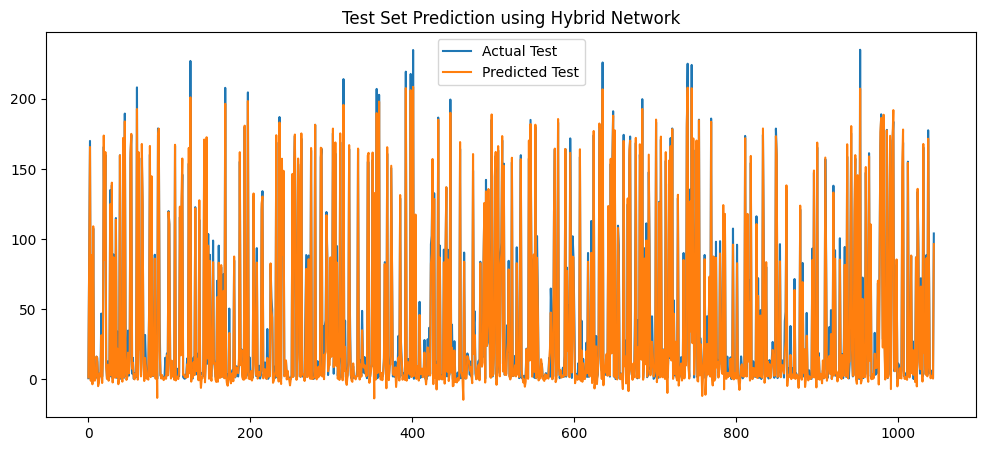

In [51]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv_hybrid,label='Actual Test')
plt.plot(y_pred_test_inv_hybrid,label='Predicted Test')
plt.title('Test Set Prediction using Hybrid Network')
plt.legend()
plt.show()

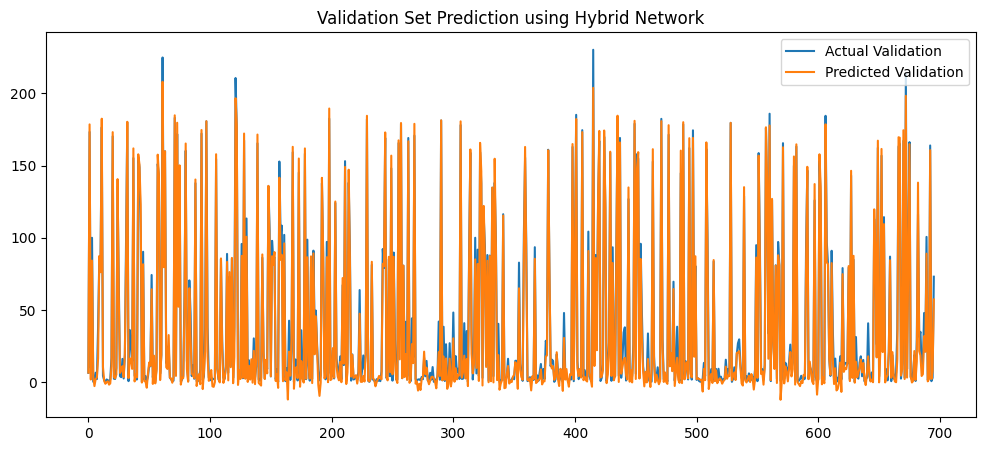

In [52]:
# Validation
plt.figure(figsize=(12,5))
plt.plot(y_val_inv_hybrid,label='Actual Validation')
plt.plot(y_pred_val_inv_hybrid,label='Predicted Validation')
plt.title('Validation Set Prediction using Hybrid Network')
plt.legend()

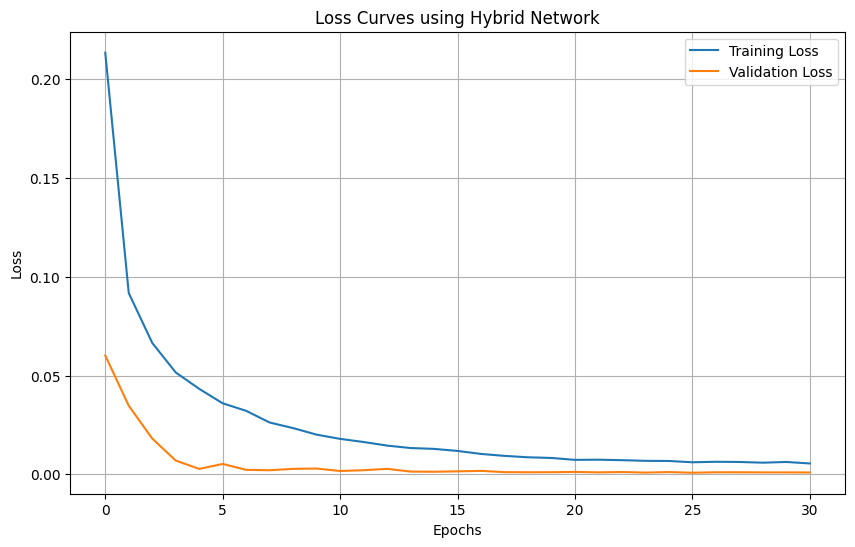

In [53]:
plt.figure(figsize=(10,6))
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Loss')
plt.title('Loss Curves using Hybrid Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()